### MANUAL CLASSIFICATION SCRIPTS
The clicking feature may only work with jupyter notebook not jupyter lab (or vice versa) - Justin

In [1]:
# load dependencies and allow interactivity
%matplotlib widget
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import numpy as np

### INDEXING
First run set_of_ten with empty []. Then populate set_of_ten list with different scenes from different snow conditions that are optimal to train the model on. Also note which scenes will most likely be bad for SCA processing. The bad scenes you can populate the list in 2_process_SCA.ipynb filtered_scenes with those bad scenes so remove before even running SCA prediction.

In [2]:
# user definitions
# name = 'BUDD'
name = 'DLNY'
# name = 'LYMC'
data_direc = f'/data0/images/planet/emma/planet/{name}/'
# data_direc = f'/home/etboud/projects/data/planet/{name}/'
focus_year = 2022

# set to 0 if classifying snow-absent gridcells
# set to 1 if classifying snow-covered gridcells
# set to 2 if classifying glint or other image errors/occlusions
snow_present = 2

# specify the indices of the images that you want to click through
# 737 snow presence/absence scenes
# set_of_ten = [86,73,68,64,61,57,48,42,27,16]
# 737 image artifacts
# set_of_ten = [47,50,52,69,11,13,30,31,43,46]
# 869 snow presence/absence scenes
# set_of_ten = [56,51,47,45,43,40,35,29,26,24]
# 869 image artifacts
# set_of_ten = [36,29,6,5,4,1]
# 551 snow presence/absence scenes
# set_of_ten = [70,61,55,51,49,45,41,33,26,23]
# 551 image artifacts
# set_of_ten = [38,3,2,1]
# DAN snow presence/absence scenes
# set_of_ten = [90,89,84,89,77,74,66,63,30,28]
# DAN image artifacts
# set_of_ten = [73,65,58,54,52,45]
# DPO snow presence/absence scenes
# set_of_ten = [125,120,115,113,109,103,96,87,78,60]
# DPO image artifacts
# set_of_ten = [74,66,64,58,55]
# GIN snow presence/absence scenes
# set_of_ten = [62,57,55,52,50,42,17,12,8,2]
# GIN image artifacts
# set_of_ten = [49,41,37,34,26]
# STR snow presence/absence scenes
# set_of_ten = [95,93,91,89,86,81,78,63,56,34]
# STR image artifacts
# set_of_ten = [53,47,66]



# BUDD snow presence/absence/artifacts scenes from 2022 scenes
# set_of_ten = [7,30,34,39,43,44,48,57,64,86,88,97]
# BUDD snow presence/absence scenes from 2022 scenes
# set_of_ten = [16,30,39,45,46,51,60,64,77,86]
# BUDD image artifacts from 2022 scenes
# set_of_ten = [28,30,37,44,54]
set_of_ten = []

subdirecs = sorted([d for d in glob.glob(data_direc + str(focus_year) + '*') if os.path.isdir(d)])
print('length of data record: ',len(subdirecs))

length of data record:  119


In [3]:
#### functions
def calc_rgb(ds):
    # Selecting RGB bands
    blue_band = ds.isel(band=0)
    green_band = ds.isel(band=1)
    red_band = ds.isel(band=2)
    nir_band = ds.isel(band=3)
    
    # normalize to help visual understanding
    maxval = green_band.max().values
    minval = green_band.min().values
    red_norm = (red_band - minval) / (maxval - minval)
    green_norm = (green_band - minval) / (maxval - minval)
    blue_norm = (blue_band - minval) / (maxval - minval)
    green_norm = green_norm.where(red_norm <= 1,1)
    blue_norm = blue_norm.where(red_norm <= 1,1)
    red_norm = red_norm.where(red_norm <= 1,1)

    # port to numpy
    red_band = red_band.values
    green_band = green_band.values
    blue_band = blue_band.values
    nir_band = nir_band.values
    
    # Stack normalized bands to create RGB image
    rgb_image = np.stack([red_norm, green_norm, blue_norm], axis=-1)
    return red_band,green_band,blue_band,nir_band,rgb_image


# initialize
clicked_points = []

/tmp/ipykernel_2051462/2905929502.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fg, ax = plt.subplots(figsize=(4, 4))


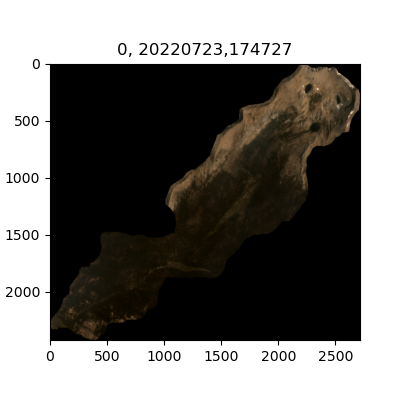

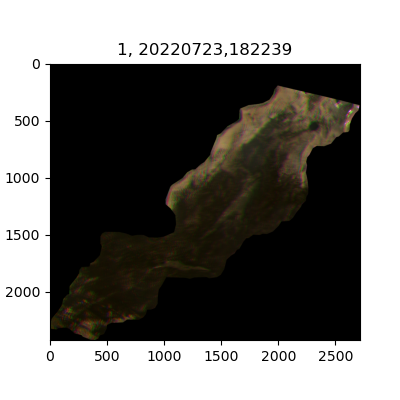

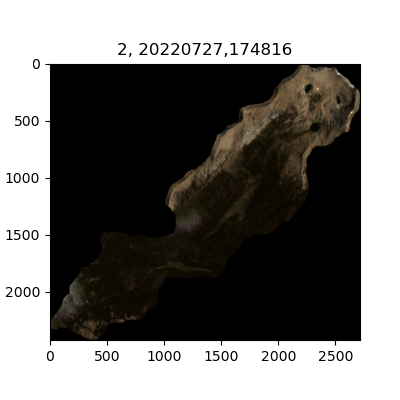

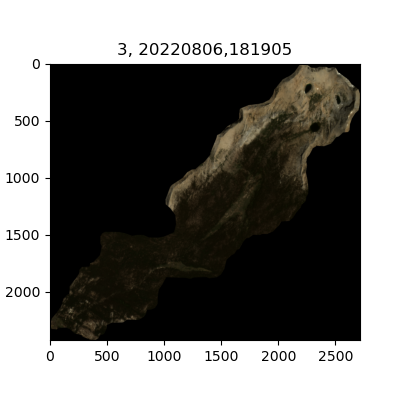

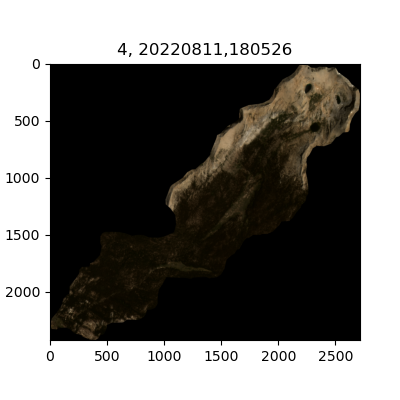

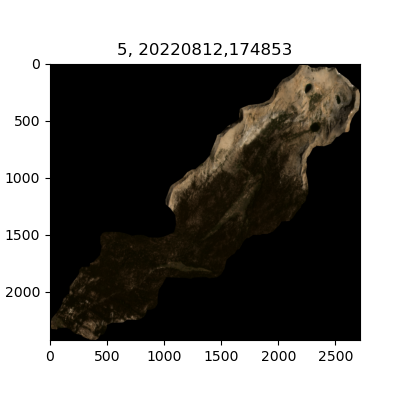

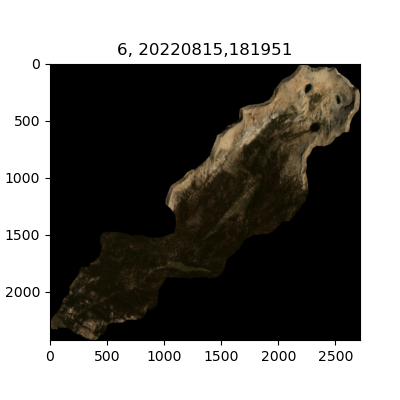

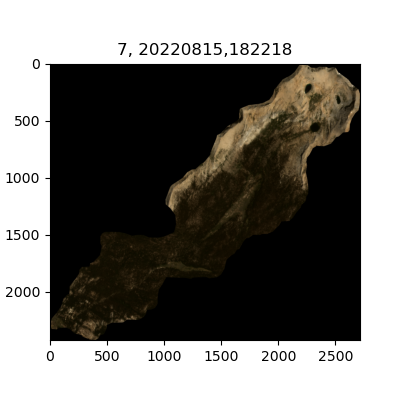

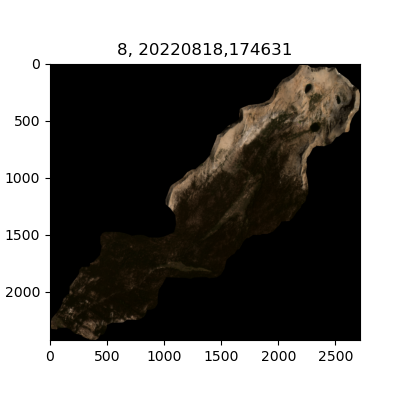

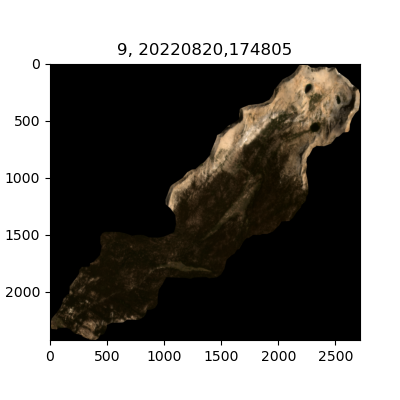

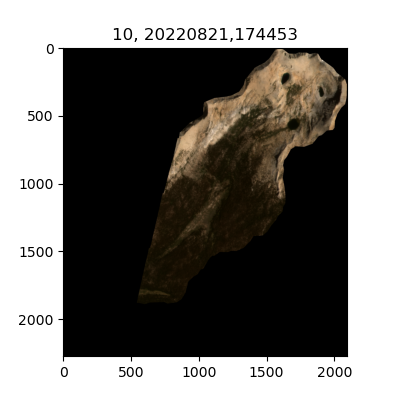

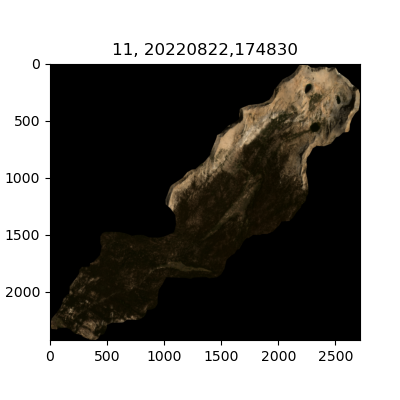

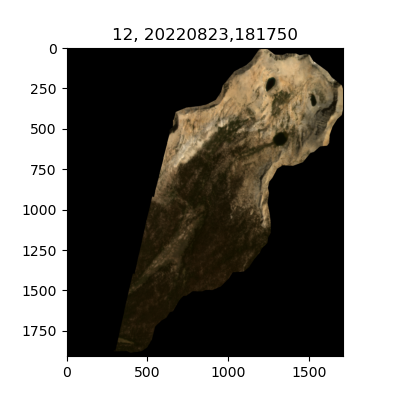

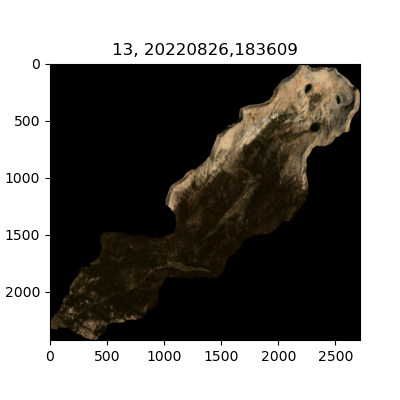

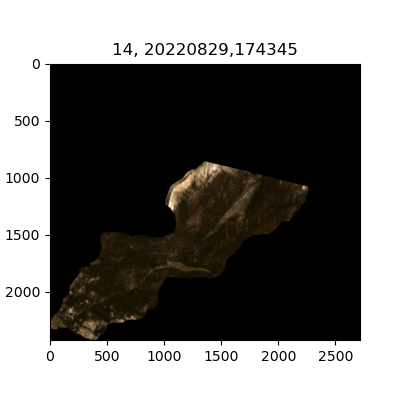

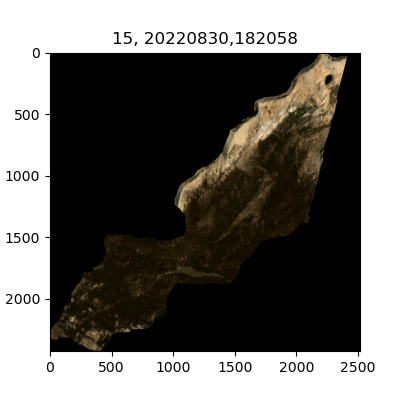

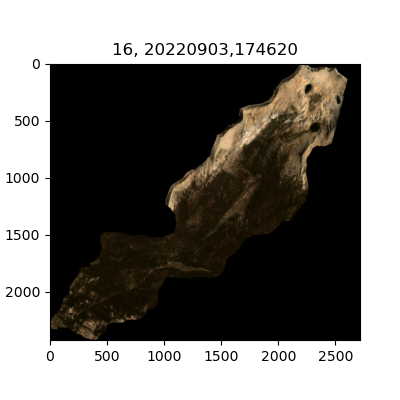

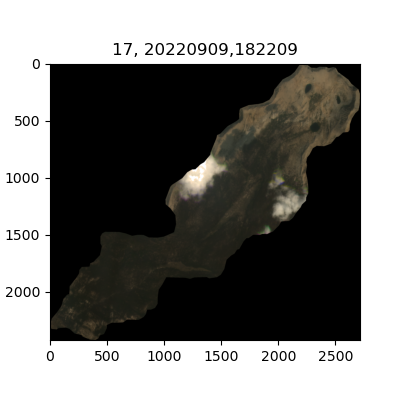

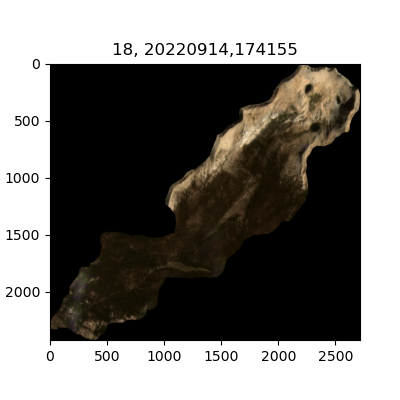

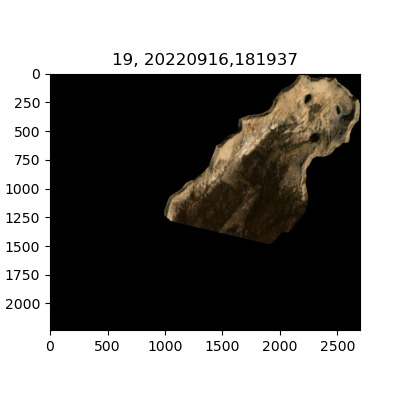

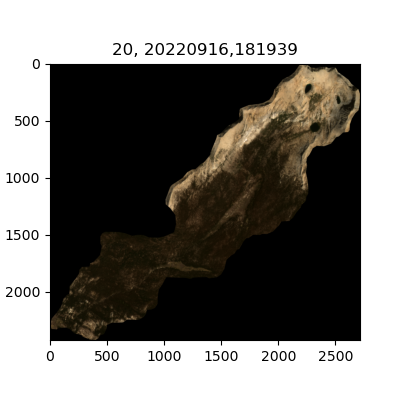

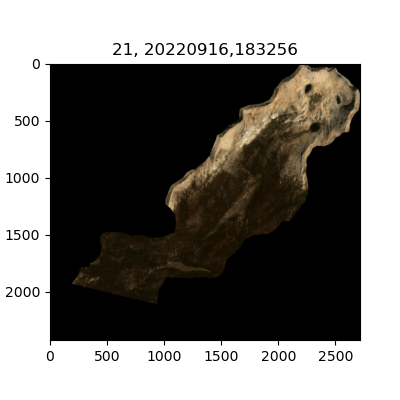

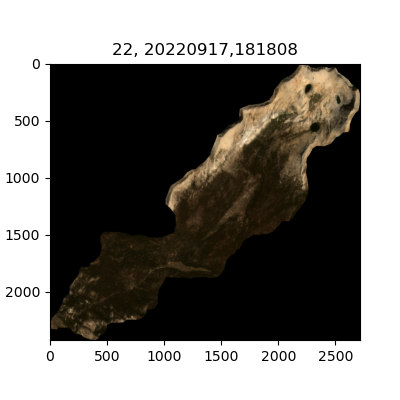

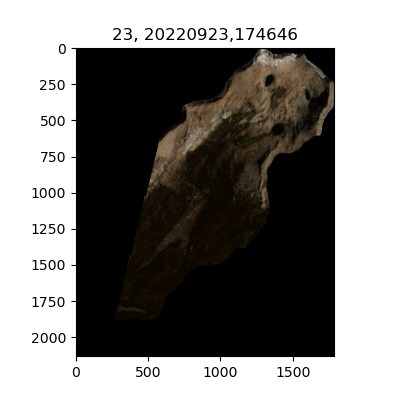

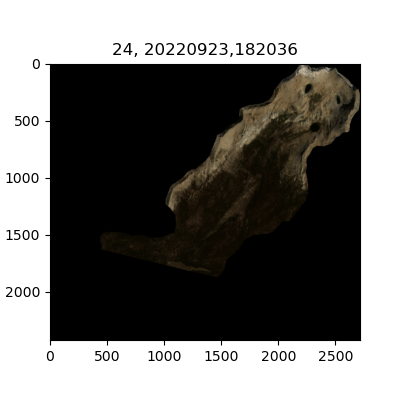

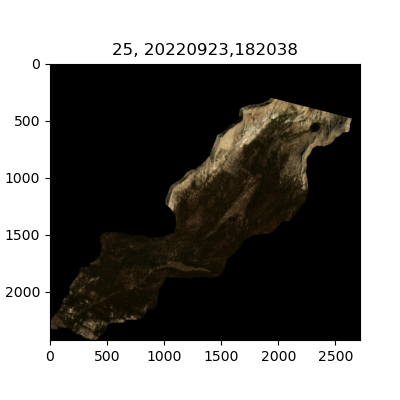

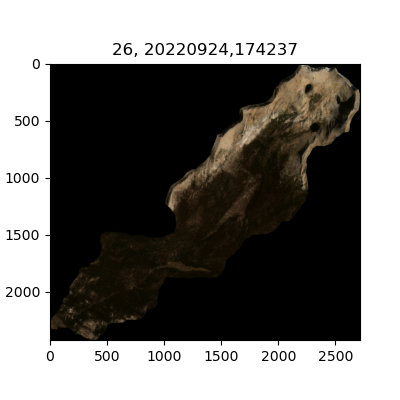

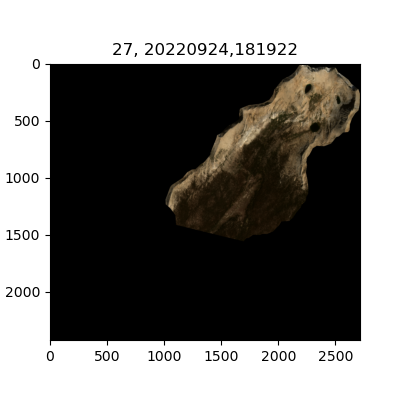

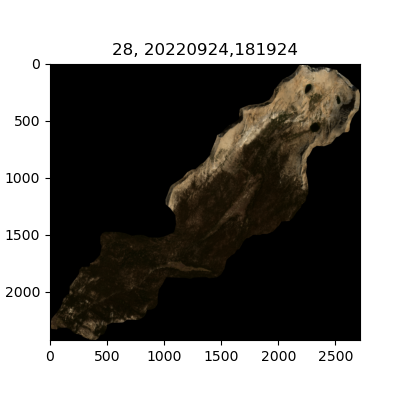

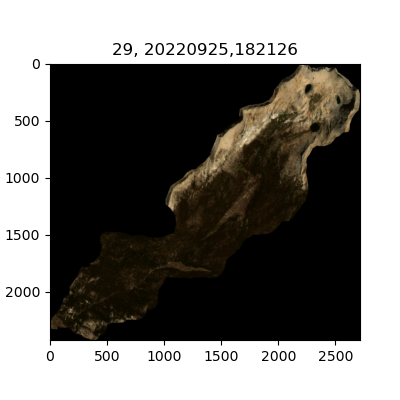

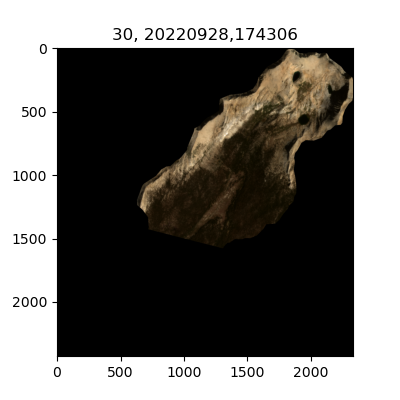

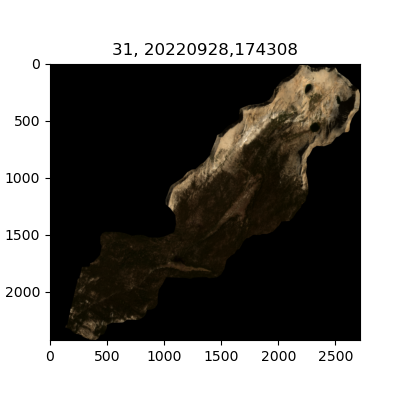

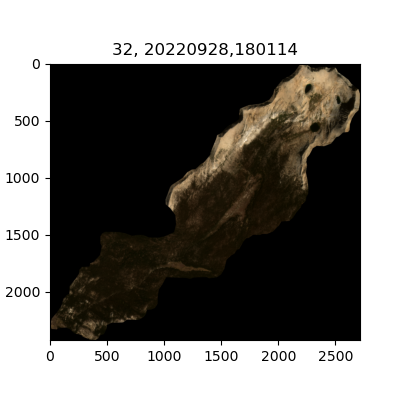

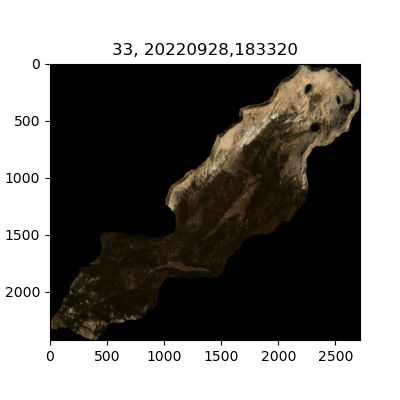

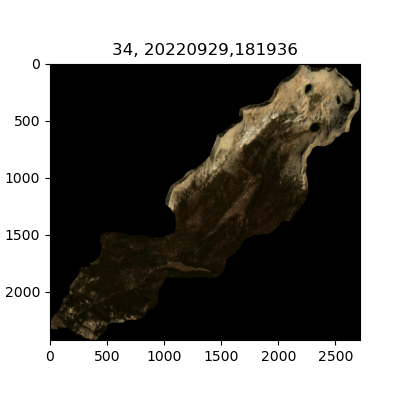

In [4]:
# Plot scenes to determine which to pick for set_of_ten
# leave set_of_ten empty to plot all scenes
for direcCount, direcc in enumerate(subdirecs[84:]):  
    try:
        fname = glob.glob(direcc + '/*/PSScene/*SR_clip.tif')[0]
        ds = rxr.open_rasterio(fname)
        red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

        fg, ax = plt.subplots(figsize=(4, 4))
        ax.imshow(rgb_image, cmap='gray')
        ax.set_title(f'{direcCount}, {fname.split("/")[-1].split("_")[0]},{fname.split("/")[-1].split("_")[1]}')

    except:
        print('bad data')

In [ ]:

# focus_year = 2022
# filtered_scenes = [0,1,2,4,7,8,9,11,12,13,14,17,18,19,21,22,23,25,26,26,28,29,32,33,36,38,41,42,50,52,56,59,61,66,68,70,75,76,83] 
# for dCount,direcc in enumerate(subdirecs):
#     if dCount not in filtered_scenes:
#         fname = glob.glob(direcc + '/*/PSScene/*SR_clip.tif')[0]
#         ds = rxr.open_rasterio(fname)
#         red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

#         fg, ax = plt.subplots(figsize=(4, 4))
#         ax.imshow(rgb_image, cmap='gray')
#         ax.set_title(f'{dCount}, {fname.split("/")[-1].split("_")[0]}')


In [ ]:
direcc = subdirecs[set_of_ten[0]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[1]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[2]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[3]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[4]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[5]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[6]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[7]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[8]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[9]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[10]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
direcc = subdirecs[set_of_ten[11]]
fname = glob.glob(direcc+'/*/PSScene/*SR_clip.tif')[0]
ds = rxr.open_rasterio(fname)
red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, cmap='gray')

# Function to handle mouse clicks
def onclick(event):
    if event.button == 1:  # Left mouse button clicked
        x = int(event.xdata)
        y = int(event.ydata)
        clicked_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                               rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))
        plt.plot(x, y, 'ro')  # Mark clicked point with red dot
        plt.draw()

# Connect the mouse click event to the onclick function
plt.connect('button_press_event', onclick)
plt.show()

In [ ]:
df = pd.DataFrame(clicked_points, columns=['x', 'y','r','g','b','nir','r_norm','g_norm','b_norm'])
print(df)

if snow_present == 0:
    df.to_csv(data_direc+'self_classified/self_classified_'+str(focus_year)+'_class0.csv')
elif snow_present == 1:
    df.to_csv(data_direc+'self_classified/self_classified_'+str(focus_year)+'_class1.csv')
else:
    df.to_csv(data_direc+'self_classified/self_classified_'+str(focus_year)+'_class2.csv')

#### MODEL TRAINING SCRIPTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import glob
from sklearn.model_selection import cross_val_score
import joblib

data_direc = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/'
data_direc = '/home/etboud/projects/data/planet/BUDD/'

In [ ]:
X0 = pd.read_csv(data_direc+'self_classified/self_classified_2022_class0.csv')
X0 = X0.assign(label=0)
X1 = pd.read_csv(data_direc+'self_classified/self_classified_2022_class1.csv')
X1 = X1.assign(label=1)
X2 = pd.read_csv(data_direc+'self_classified/self_classified_2022_class2.csv')
X2 = X2.assign(label=2)
X = pd.concat([X0,X1,X2])
y = np.ravel(X[['label']].values)
X

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1000, random_state=1)
n_accuracy = cross_val_score(model, X[['b','g','r','nir']],y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# n_f1 = cross_val_score(model,X[['b','g','r','nir']], y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_balanced_accuracy = cross_val_score(model,X[['b','g','r','nir']], y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# report performance
# plt.hist(n_f1)
print('Repeat times:'.format(), len(n_accuracy))
# print('F1-score: %.5f (%.5f)' % (n_f1.mean(), n_f1.std()))
print('Balanced Accuracy: %.5f (%.5f)' % (n_balanced_accuracy.mean(), n_balanced_accuracy.std()))
print('Accuracy: %.5f (%.5f)' % (n_accuracy.mean(), n_accuracy.std()))

In [ ]:
# fit model with all observations
model.fit(X[['b','g','r','nir']],y)
joblib.dump(model,data_direc+'self_classified/3class_model_2022.joblib')

### Crop to train in cnaopy/ out of canopy (9/30)

In [4]:
def create_binary_chm(chm, basin):
    # Load the CHM as an xarray DataArray and clip it
    chm_mask = rxr.open_rasterio(chm, all_touched=False, drop=True, masked=True).rio.clip(basin.geometry.values, all_touched=False, drop=True)

    # Calculate mean and max for further analysis if needed
    mean = np.nanmean(chm_mask.values)
    max_value = np.nanmax(chm_mask.values)

    # Create binary mask
    chm_mask.values = np.where(chm_mask < 2, 1, 0)  # Set 1 for open and 0 for forest

    # Count open and forest pixels
    one_cnt = (chm_mask.values == 1).sum()
    zero_cnt = (chm_mask.values == 0).sum()
    fcan = zero_cnt / (one_cnt + zero_cnt) * 100  # Calculate forest cover percentage

    return chm_mask, mean, max_value, fcan


# Create basin shapefile
BS = f'/home/etboud/projects/data/basins/{name}/{name}_4326.geojson'
basin = gpd.read_file(BS)
basin = basin.to_crs('EPSG:32611') 

# canopy height model
CHM = '/home/etboud/projects/data/CHM/USCATB20140827_chm_3p0m.tif'
# Assuming chm and basin are already defined
chm_mask, mean, max_value, fcan = create_binary_chm(CHM, basin)

# Mask out the RGI and WBD Testing
rgi = '/home/etboud/projects/data/RGI/02_rgi60_WesternCanadaUS/02_rgi60_WesternCanadaUS.shp'
rgi_mask = gpd.read_file(rgi).to_crs('EPSG:32611')
wbd = '/home/etboud/projects/data/masks/NHDWaterbody.shp'
wbd_mask = gpd.read_file(wbd).to_crs('EPSG:32611')

In [6]:
# Load your satellite image and mask it
ps_file = '/data0/images/planet/emma/planet/BUDD/20220519_181736_12_248b/c4867740-33a9-4a13-afd0-f7432161b8ff/PSScene/20220519_181736_12_248b_3B_AnalyticMS_SR_clip.tif'

ps_image = rxr.open_rasterio(ps_file, masked=True)
ps_image = ps_image.rio.clip(basin.geometry.values, crs=basin.crs)
red_band, green_band, blue_band, nir_band, image_rgb = calc_rgb(ps_image)

In [7]:
import xarray as xa
chm_mask_0 = chm_mask
chm_mask_1 = chm_mask
chm_mask_2 = chm_mask
chm_mask_3 = chm_mask

# stack chm arrays
stacked_chm = xa.concat([chm_mask_0,chm_mask_1,chm_mask_2,chm_mask_3],dim='band')
stacked_chm.coords['band']=ps_image.coords['band']


In [8]:
rgb_chm = ps_image*stacked_chm
red_band, green_band, blue_band, nir_band, image_chm_rgb = calc_rgb(rgb_chm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


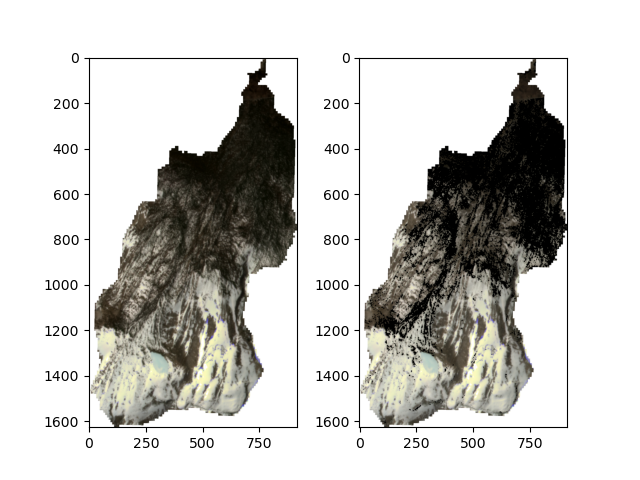

In [9]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(image_rgb)
ax[1].imshow(image_chm_rgb)


### Training set with multiple ASO flights 

In [ ]:
budd_csv = pd.read_csv('/home/etboud/projects/data/training_data/aso_BUDD_20220518_binary_V5.csv').dropna()
dlny_csv = pd.read_csv('/home/etboud/projects/data/training_data/aso_DLNY_2023_binary.csv').dropna()
lymc_csv = pd.read_csv('/home/etboud/projects/data/training_data/aso_LYMC_20200508_binary_V8.csv').dropna()

In [ ]:
combined = pd.concat([budd_csv,dlny_csv,lymc_csv])

### Train with ASO flight

In [ ]:
# # To create binary ASO maps for training label
# from working_sca_funcs import validation_tif_binary
# p = glob.glob('/home/etboud/projects/data/aso/'+ '*3m*tif')
# name = 'LYMC'
# year = '2020'
# BS = f'/home/etboud/projects/data/basins/{name}/{name}_4326.geojson'
# basin = gpd.read_file(BS)
# basin = basin.to_crs('EPSG:32611')
# binary_val = validation_tif_binary(p, basin, year, name)

# # Visualize aso before creating csv
# p = glob.glob('/home/etboud/projects/data/aso/validation/LYMC/V2/'+ '*3m*tif')

# f = rxr.open_rasterio(p[1], masked=True)
# f_clip = f.rio.clip(basin.geometry)
# plt.figure(figsize=(10, 10))
# plt.imshow(f_clip[0], interpolation = "None")

In [10]:
# Define ASO and PS files to create training data with
ps_tif = '/data0/images/planet/emma/planet/BUDD/20220519_181736_12_248b/c4867740-33a9-4a13-afd0-f7432161b8ff/PSScene/20220519_181736_12_248b_3B_AnalyticMS_SR_clip.tif' 
# ps_tif = '/data0/images/planet/emma/planet/LYMC/20200508_184915_56_1060/97a01899-7e45-4b2c-97e6-754f5d254992/PSScene/20200508_184915_56_1060_3B_AnalyticMS_SR_clip.tif'
# aso_tif = '/home/etboud/projects/data/aso/validation/LYMC/V2/ASO_Tuolumne_2020May07_snowdepth_3m_binary.tif'
aso_tif = '/home/etboud/projects/data/aso/validation/BUDD/V2/ASO_Tuolumne_2022May18_snowdepth_3m_binary.tif'
# Load basin geopandas object
BS = '/home/etboud/projects/data/basins/BUDD/BUDD_4326.geojson'
basin = gpd.read_file(BS)
basin=basin.to_crs('EPSG:32611')

In [11]:
# Open and clip the planet scene
with rxr.open_rasterio(ps_tif, masked=True) as ds:
    ds_clipped = ds.rio.clip(basin.geometry)
    ds_clipped_masked = ds_clipped * stacked_chm
    # Calculate RGB and NIR bands
    red_band, green_band, blue_band, nir_band, rgb_image = calc_rgb(ds_clipped_masked)

    # Initialize ps_points list
    ps_points = []

    # Get dimensions of the image
    height, width = red_band.shape

    # Iterate over all pixel coordinates
    for y in range(height):
        for x in range(width):
            ps_points.append((x, y, red_band[y, x], green_band[y, x], blue_band[y, x], nir_band[y, x],
                                rgb_image[y, x, 0], rgb_image[y, x, 1], rgb_image[y, x, 2]))

# Create dataframe for PS data
ps_df = pd.DataFrame(ps_points, columns=['x', 'y','r','g','b','nir','r_norm','g_norm','b_norm'])

In [12]:
# Open and clip ASO dataset
with rxr.open_rasterio(aso_tif, masked=True) as ds:
    ds_clipped = ds.rio.clip(basin.geometry, drop=False)

    # Initialize aso_points list
    aso_points = []

    # Get dimensions of the clipped image
    height, width = ds_clipped.shape[1], ds_clipped.shape[2]

    # Iterate over all pixel coordinates
    for y in range(height):
        for x in range(width):
            aso_points.append((x, y, ds_clipped.values[0, y, x]))

# Create dataframe for aso label
aso_df = pd.DataFrame(aso_points, columns=['x', 'y', 'label'])


In [13]:
# Merge the two dataframes on the pixel counts
merged_df = pd.merge(aso_df, ps_df, on=['x', 'y'])

In [14]:
merged_df.to_csv('aso_BUDD_20220518_binary_open_V9.csv')

In [15]:
df_open = pd.read_csv('/home/etboud/projects/data/training_data/aso_BUDD_20220518_binary_open_V9.csv')
df_canopy = pd.read_csv('/home/etboud/projects/data/training_data/aso_BUDD_20220518_binary_canopy_V9.csv')

In [16]:
df_canopy.dropna()

Unnamed: 0    x     y  label    r    g    b  nir  r_norm  g_norm  \
771             771  771     0    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
772             772  772     0    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
773             773  773     0    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
774             774  774     0    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
775             775  775     0    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
...             ...  ...   ...    ...  ...  ...  ...  ...     ...     ...   
1486292     1486292  128  1626    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
1486293     1486293  129  1626    0.0  0.0  0.0  0.0  0.0     0.0     0.0   
1486294     1486294  130  1626    1.0  0.0  0.0  0.0  0.0     0.0     0.0   
1486295     1486295  131  1626    1.0  0.0  0.0  0.0  0.0     0.0     0.0   
1486296     1486296  132  1626    1.0  0.0  0.0  0.0  0.0     0.0     0.0   

         b_norm  
771         0.0  
772         0.0  
773         0.0  
774         0.0  
775         0.0  
...         ...  
1486292     0.0  
1486293     0.0  
1486294     0.0  
1486295     0.0  
1486296     0.0  

[825096 rows x 11 columns]

In [17]:
df_open.dropna()

Unnamed: 0    x     y  label       r       g       b     nir  \
771             771  771     0    0.0  1685.0  1454.0  1155.0  2839.0   
772             772  772     0    0.0  1620.0  1427.0  1064.0  2792.0   
773             773  773     0    0.0  1557.0  1398.0   996.0  2790.0   
774             774  774     0    0.0  1569.0  1391.0  1012.0  2733.0   
775             775  775     0    0.0  1670.0  1442.0  1072.0  2734.0   
...             ...  ...   ...    ...     ...     ...     ...     ...   
1486292     1486292  128  1626    0.0  2156.0  2018.0  1632.0  3942.0   
1486293     1486293  129  1626    0.0  2326.0  2248.0  1820.0  3999.0   
1486294     1486294  130  1626    1.0  2374.0  2185.0  1821.0  4051.0   
1486295     1486295  131  1626    1.0  2527.0  2294.0  1898.0  4057.0   
1486296     1486296  132  1626    1.0  2682.0  2421.0  2003.0  4137.0   

           r_norm    g_norm    b_norm  
771      0.192352  0.165982  0.131849  
772      0.184932  0.162900  0.121461  
773      0.177740  0.159589  0.113699  
774      0.179110  0.158790  0.115525  
775      0.190639  0.164612  0.122374  
...           ...       ...       ...  
1486292  0.246119  0.230365  0.186301  
1486293  0.265525  0.256621  0.207763  
1486294  0.271005  0.249429  0.207877  
1486295  0.288470  0.261872  0.216667  
1486296  0.306164  0.276370  0.228653  

[825096 rows x 11 columns]

In [25]:
df_canopy = df_canopy.dropna()
df_open = df_open.dropna()
canopy_df = df_canopy[(df_canopy['r']!=0)&(df_canopy['g']!=0)&(df_canopy['b']!=0)&(df_canopy['nir']!=0)]
open_df = df_open[(df_open['r']!=0)&(df_open['g']!=0)&(df_open['b']!=0)&(df_open['nir']!=0)]

In [27]:
canopy_df

Unnamed: 0    x     y  label       r       g       b     nir  \
19057         19057  777    20    0.0  1424.0  1264.0   944.0  2683.0   
19969         19969  775    21    0.0  1391.0  1235.0   878.0  2555.0   
19970         19970  776    21    0.0  1375.0  1221.0   873.0  2583.0   
19971         19971  777    21    0.0  1433.0  1284.0   940.0  2662.0   
20882         20882  774    22    0.0  1365.0  1201.0   869.0  2515.0   
...             ...  ...   ...    ...     ...     ...     ...     ...   
1471649     1471649  109  1610    0.0  2097.0  1967.0  1610.0  3446.0   
1471650     1471650  110  1610    0.0  2132.0  1991.0  1674.0  3409.0   
1471651     1471651  111  1610    0.0  2283.0  2165.0  1859.0  3384.0   
1471652     1471652  112  1610    0.0  2269.0  2175.0  1855.0  3303.0   
1472565     1472565  111  1611    0.0  2433.0  2301.0  1978.0  3406.0   

           r_norm    g_norm    b_norm  
19057    0.173977  0.154429  0.115333  
19969    0.169945  0.150886  0.107269  
19970    0.167990  0.149175  0.106659  
19971    0.175076  0.156872  0.114844  
20882    0.166768  0.146732  0.106170  
...           ...       ...       ...  
1471649  0.256200  0.240318  0.196701  
1471650  0.260476  0.243250  0.204520  
1471651  0.278925  0.264508  0.227123  
1471652  0.277214  0.265730  0.226634  
1472565  0.297251  0.281124  0.241662  

[285191 rows x 11 columns]

In [26]:
open_df

Unnamed: 0    x     y  label       r       g       b     nir  \
771             771  771     0    0.0  1685.0  1454.0  1155.0  2839.0   
772             772  772     0    0.0  1620.0  1427.0  1064.0  2792.0   
773             773  773     0    0.0  1557.0  1398.0   996.0  2790.0   
774             774  774     0    0.0  1569.0  1391.0  1012.0  2733.0   
775             775  775     0    0.0  1670.0  1442.0  1072.0  2734.0   
...             ...  ...   ...    ...     ...     ...     ...     ...   
1486292     1486292  128  1626    0.0  2156.0  2018.0  1632.0  3942.0   
1486293     1486293  129  1626    0.0  2326.0  2248.0  1820.0  3999.0   
1486294     1486294  130  1626    1.0  2374.0  2185.0  1821.0  4051.0   
1486295     1486295  131  1626    1.0  2527.0  2294.0  1898.0  4057.0   
1486296     1486296  132  1626    1.0  2682.0  2421.0  2003.0  4137.0   

           r_norm    g_norm    b_norm  
771      0.192352  0.165982  0.131849  
772      0.184932  0.162900  0.121461  
773      0.177740  0.159589  0.113699  
774      0.179110  0.158790  0.115525  
775      0.190639  0.164612  0.122374  
...           ...       ...       ...  
1486292  0.246119  0.230365  0.186301  
1486293  0.265525  0.256621  0.207763  
1486294  0.271005  0.249429  0.207877  
1486295  0.288470  0.261872  0.216667  
1486296  0.306164  0.276370  0.228653  

[539905 rows x 11 columns]

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import joblib

# data_direc = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/'
data_direc = '/home/etboud/projects/data/training_data/'


In [34]:
X = canopy_df.dropna()
X = X.sample(n=10000)
y = np.ravel(X['label'])

In [35]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1000, random_state=1)
n_accuracy = cross_val_score(model, X[['b','g','r','nir']],y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# n_f1 = cross_val_score(model,X[['b','g','r','nir']], y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
n_balanced_accuracy = cross_val_score(model,X[['b','g','r','nir']], y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [36]:
# report performance
# plt.hist(n_f1)
print('Repeat times:'.format(), len(n_accuracy))
# print('F1-score: %.5f (%.5f)' % (n_f1.mean(), n_f1.std()))
print('Balanced Accuracy: %.5f (%.5f)' % (n_balanced_accuracy.mean(), n_balanced_accuracy.std()))
print('Accuracy: %.5f (%.5f)' % (n_accuracy.mean(), n_accuracy.std()))

Repeat times: 10000
Balanced Accuracy: 0.72001 (0.01365)
Accuracy: 0.72164 (0.01360)


In [37]:
# fit model with all observations
model.fit(X[['b','g','r','nir']],y)
joblib.dump(model,data_direc+'aso_BUDD_20220518_binary_canopy_V9.joblib')

['/home/etboud/projects/data/training_data/aso_BUDD_20220518_binary_canopy_V9.joblib']